<a href="https://colab.research.google.com/github/aiswaryal/Graduate-Admission/blob/main/GraduateAdmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (3).csv


{'Admission_Predict_Ver1.1.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit \r\n1,337,118,4,4.5,4.5,9.65,1,0.92\r\n2,324,107,4,4,4.5,8.87,1,0.76\r\n3,316,104,3,3,3.5,8,1,0.72\r\n4,322,110,3,3.5,2.5,8.67,1,0.8\r\n5,314,103,2,2,3,8.21,0,0.65\r\n6,330,115,5,4.5,3,9.34,1,0.9\r\n7,321,109,3,3,4,8.2,1,0.75\r\n8,308,101,2,3,4,7.9,0,0.68\r\n9,302,102,1,2,1.5,8,0,0.5\r\n10,323,108,3,3.5,3,8.6,0,0.45\r\n11,325,106,3,3.5,4,8.4,1,0.52\r\n12,327,111,4,4,4.5,9,1,0.84\r\n13,328,112,4,4,4.5,9.1,1,0.78\r\n14,307,109,3,4,3,8,1,0.62\r\n15,311,104,3,3.5,2,8.2,1,0.61\r\n16,314,105,3,3.5,2.5,8.3,0,0.54\r\n17,317,107,3,4,3,8.7,0,0.66\r\n18,319,106,3,4,3,8,1,0.65\r\n19,318,110,3,4,3,8.8,0,0.63\r\n20,303,102,3,3.5,3,8.5,0,0.62\r\n21,312,107,3,3,2,7.9,1,0.64\r\n22,325,114,4,3,2,8.4,0,0.7\r\n23,328,116,5,5,5,9.5,1,0.94\r\n24,334,119,5,5,4.5,9.7,1,0.95\r\n25,336,119,5,4,3.5,9.8,1,0.97\r\n26,340,120,5,4.5,4.5,9.6,1,0.94\r\n27,322,109,5,4.5,3.5,8.8,0,0.76\r\n28,298,9

In [ ]:
df1 = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df1.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df1.drop('Serial No.', axis = 1, inplace = True)

In [ ]:
df1.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


Exploratory Data Analysis

In [ ]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df1.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


from above we conclude that most important parameters for chance of admission are GRE Score, TOEFL Score and CGPA

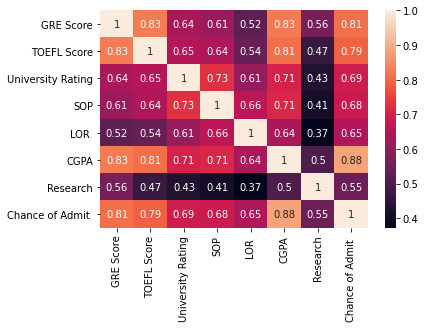

In [ ]:
sns.heatmap(df1.corr(), annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


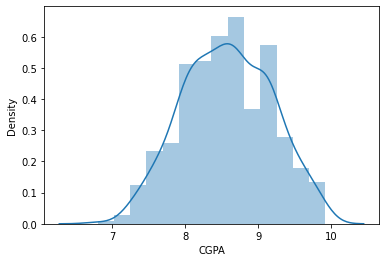

In [ ]:
sns.distplot(df1.CGPA)

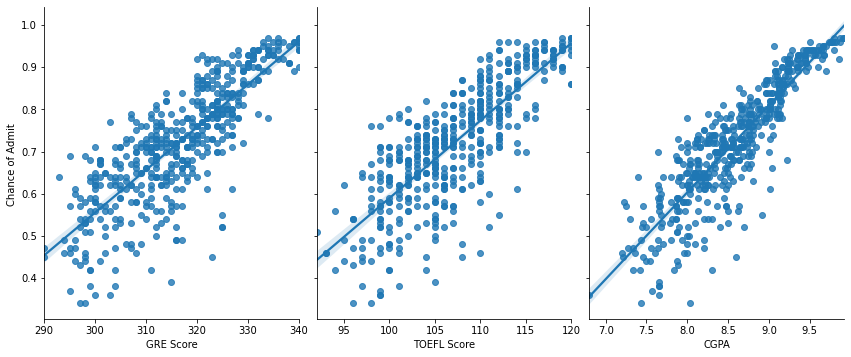

In [ ]:
sns.pairplot(df1,x_vars=['GRE Score', 'TOEFL Score','CGPA'], y_vars=['Chance of Admit '], height = 5,aspect = 0.8,kind = 'reg')

Creating Model

In [ ]:
x =df1[['GRE Score', 'TOEFL Score','CGPA']]

In [ ]:
y=df1[['Chance of Admit ']]

In [ ]:
!pip uninstall scikit-learn 

Uninstalling scikit-learn-0.19.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scikit_learn-0.19.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.19.1


In [ ]:
!pip install scikit-learn==0.19.1 

  Using cached https://files.pythonhosted.org/packages/3d/2d/9fbc7baa5f44bc9e88ffb7ed32721b879bfa416573e85031e16f52569bc9/scikit_learn-0.19.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: umap-learn 0.5.0 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =0, test_size = 0.20,train_size =0.80)

In [ ]:
x_train


,GRE Score,TOEFL Score,CGPA
107,338,117,9.46
336,319,110,8.79
71,336,112,9.76
474,308,105,7.95
6,321,109,8.20
...,...,...,...
323,305,102,8.18
192,322,114,8.94
117,290,104,7.46
47,339,119,9.70


In [ ]:
x_test

,GRE Score,TOEFL Score,CGPA
90,318,106,7.92
254,321,114,9.12
283,321,111,8.90
445,328,116,9.08
461,301,102,8.13
...,...,...,...
372,336,119,9.62
56,316,102,7.40
440,305,104,7.79
60,309,100,8.10


Training the model

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing and Evaluating the model

In [ ]:
y_pred = linreg.predict(x_test)

In [ ]:
y_pred[:7]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329]])

In [ ]:
y_test.head()

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68


Error

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.04688621359385721
